<a href="https://www.kaggle.com/code/pratishthachaturvedi/mall-customers-segments?scriptVersionId=217116978" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Clustering Steps:
1. Importing Libraries
2. Exploration of data
3. Data Visualization
4. Clustering using K-Means
5. Selection of Clusters
6. Ploting the Cluster Boundry and Clusters
7. 3D Plot of Clusters
8. Custering using K proto

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")


from sklearn.preprocessing import StandardScaler
!pip install kmodes
from kmodes.kprototypes import KPrototypes

# Data Exploration

In [2]:
df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
df = df.drop('CustomerID', axis=1)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [6]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [8]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Data Visualization

<Axes: >

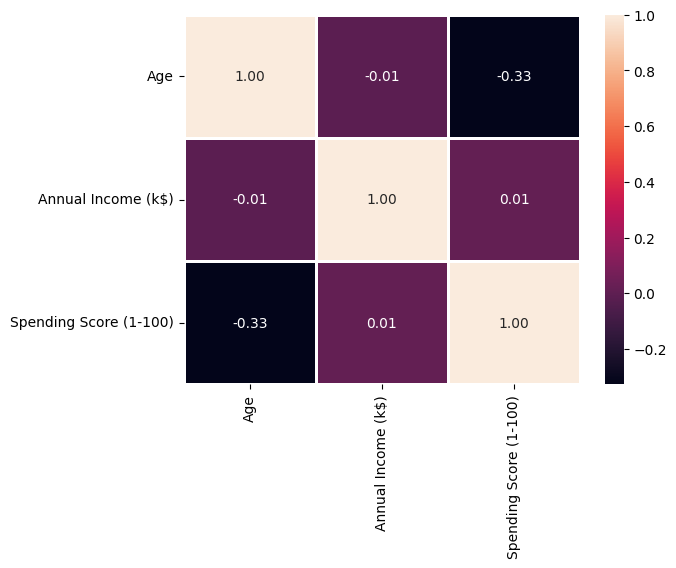

In [9]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Step 3: Create the heatmap
sns.heatmap(numerical_df.corr(), annot=True, fmt='.2f', linewidths=2, cbar=True)

### Histograms

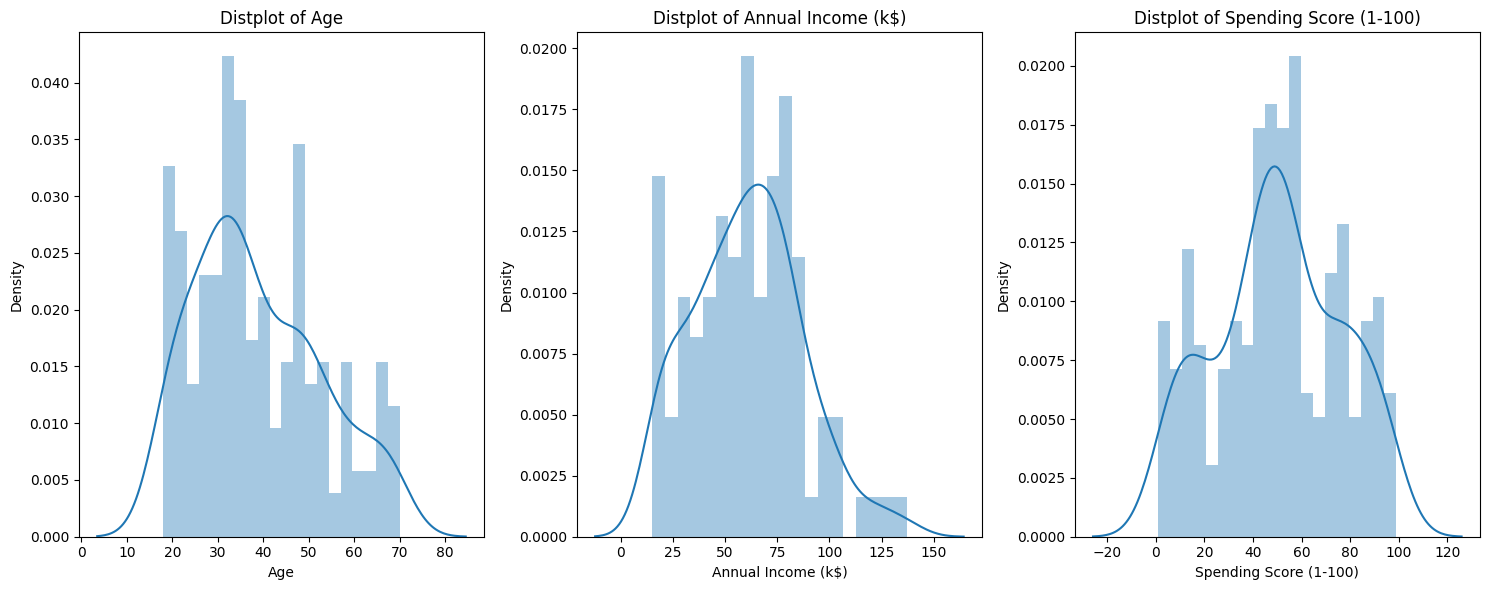

In [10]:
plt.figure(figsize = (15 , 6))
n = 0 
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.tight_layout()

#### 
- data has mix of distributions (Age is slightly skewed, Annual Income is somewhat normal but has outliers, Spending Score is more uniform), scaling the features becomes crucial.
- we will use standardization (z-score normalization) or min-max scaling to ensure each feature contributes equally to the clustering algorithm, especially for K-Means and K-Prototypes

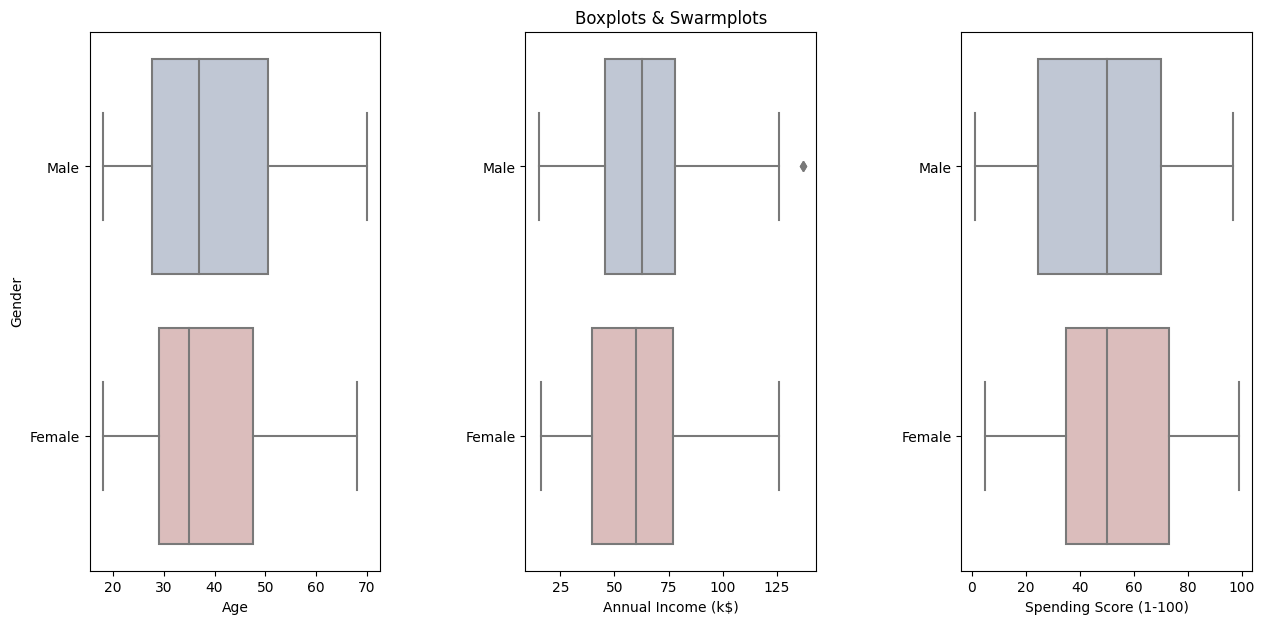

In [11]:
plt.figure(figsize=(15, 7))
n = 0

# Loop through the columns for Age, Annual Income, and Spending Score
for cols in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    
    # Boxplot for each column with respect to Gender
    sns.boxplot(x=cols, y='Gender', data=df, palette='vlag')
    
    # Conditional labels and title
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')

### Count Plot of Gender

<Axes: xlabel='count', ylabel='Gender'>

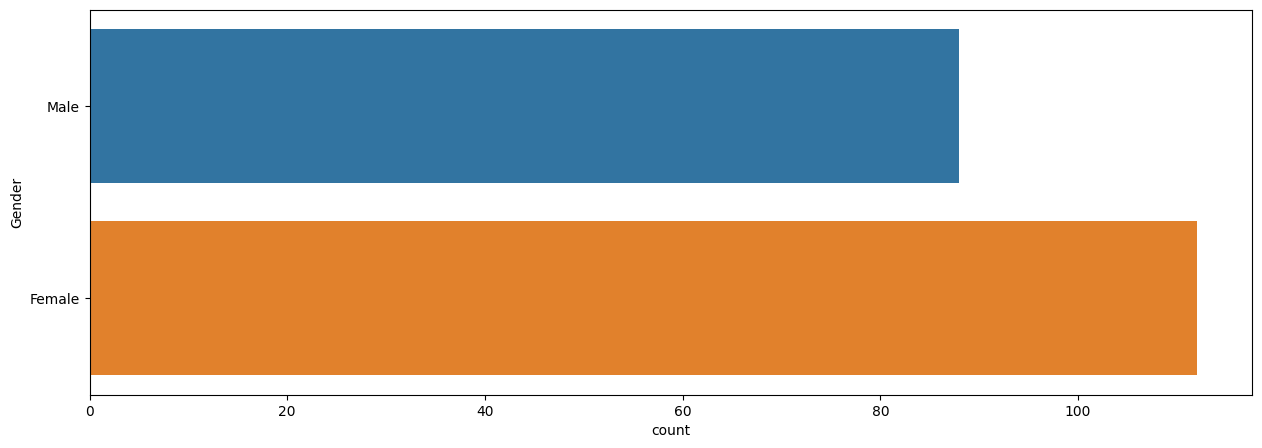

In [12]:
plt.figure(figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df)

### Ploting the Relation between Age , Annual Income and Spending Score

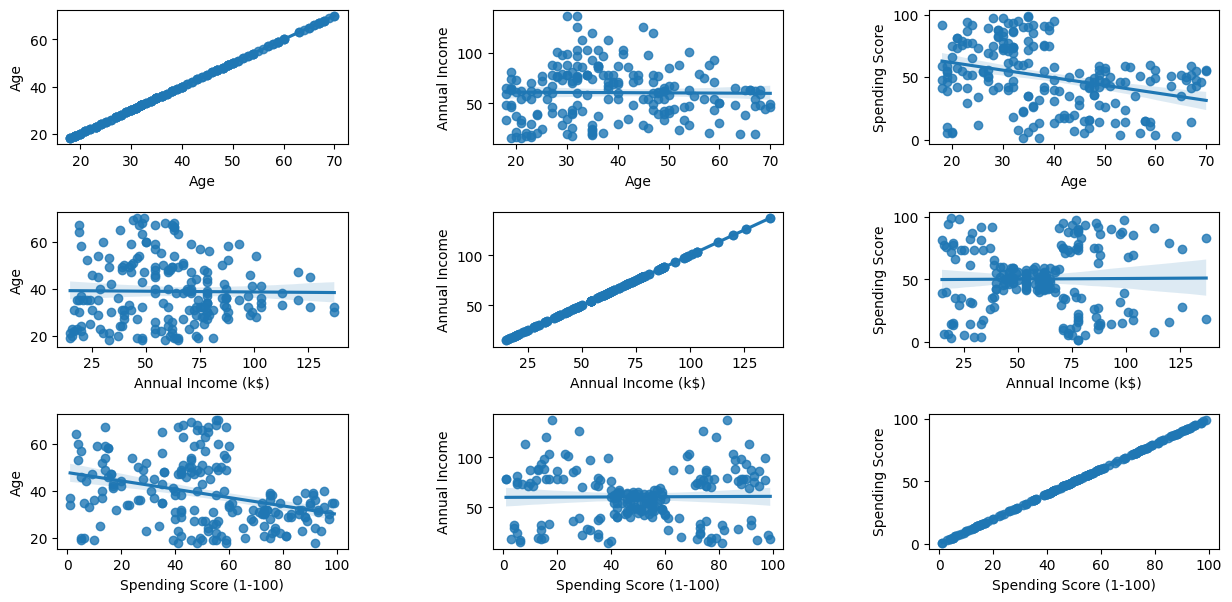

In [13]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )


- Age vs. Annual Income: no clear relationship (random spread of points).Clustering these two may not reveal strong natural clusters.

- Age vs. Spending Score: slight negative correlation. Younger customers tend to have higher Spending Scores, while older customers tend to have lower Spending Scores.This relationship could be useful for clustering, especially if you want to segment customers based on spending habits and age groups.

- Annual Income vs. Spending Score: two major groupings of Spending Scores: One near low Spending Scores (0-40). Another near high Spending Scores (60-100)

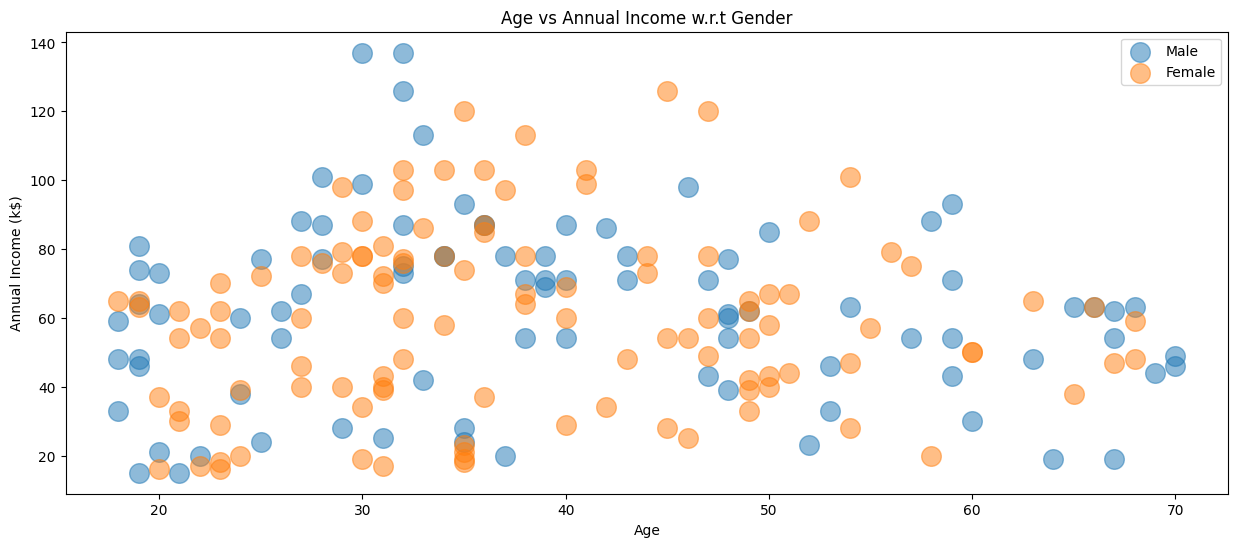

In [14]:
plt.figure(figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

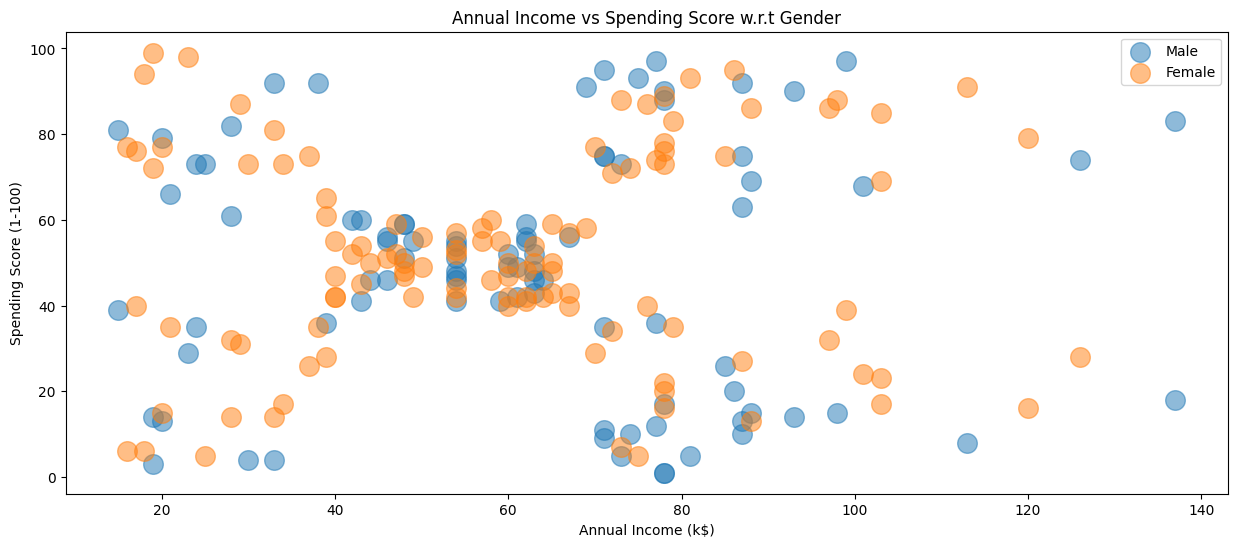

In [15]:
plt.figure(figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = df[df['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

### Distribution of values in Age , Annual Income and Spending Score according to Gender

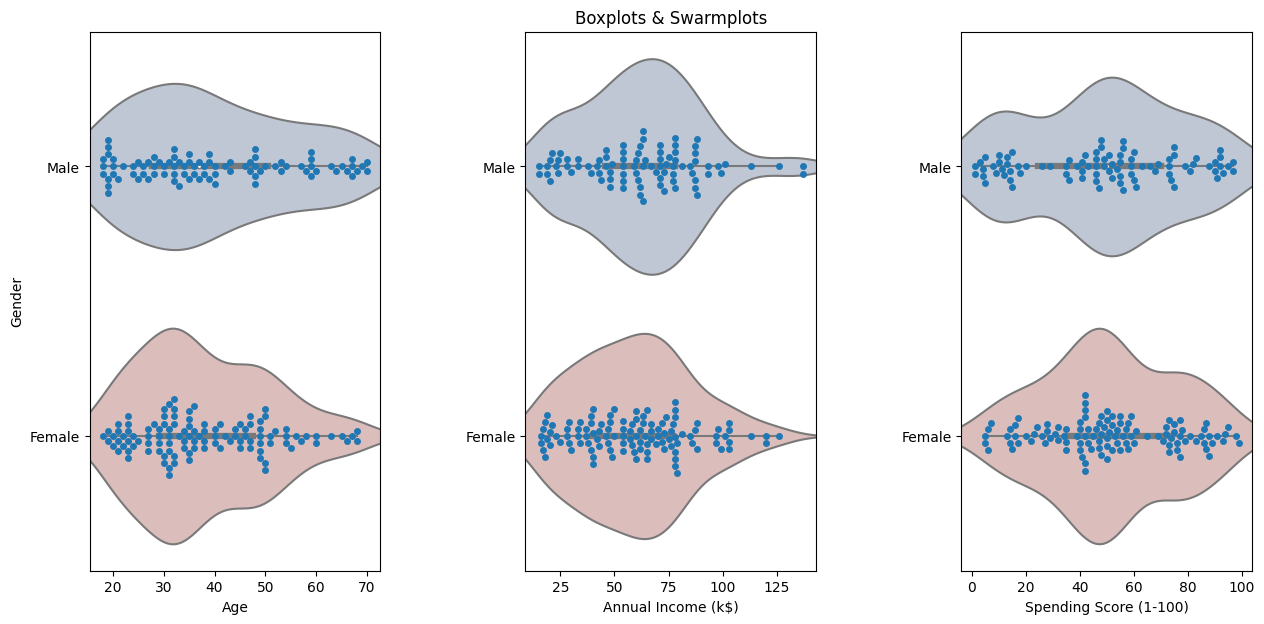

In [16]:
plt.figure(figsize = (15 , 7))
n = 0 
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

### this boxplot shows that data doesn't have many outliers

# Scaling data for distance based algorithms

In [18]:
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled_features, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
print(scaled_df.head())

        Age  Annual Income (k$)  Spending Score (1-100)
0 -1.424569           -1.738999               -0.434801
1 -1.281035           -1.738999                1.195704
2 -1.352802           -1.700830               -1.715913
3 -1.137502           -1.700830                1.040418
4 -0.563369           -1.662660               -0.395980


# Clustering using K- means

## Finding best K 

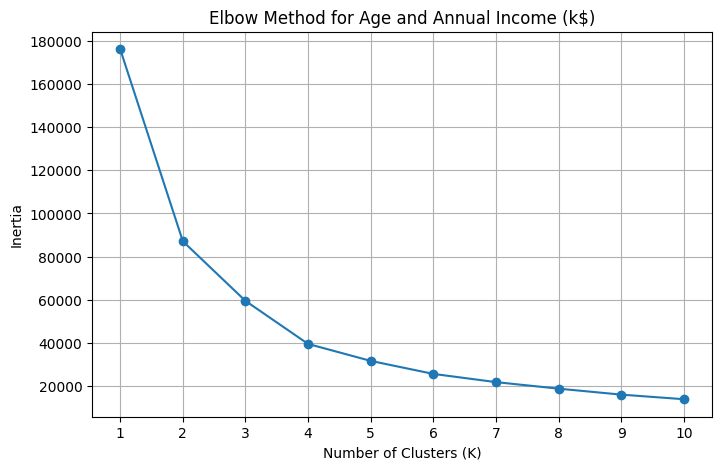

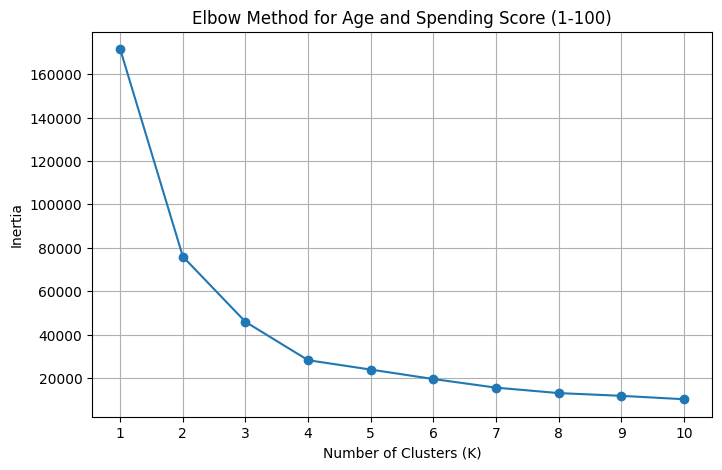

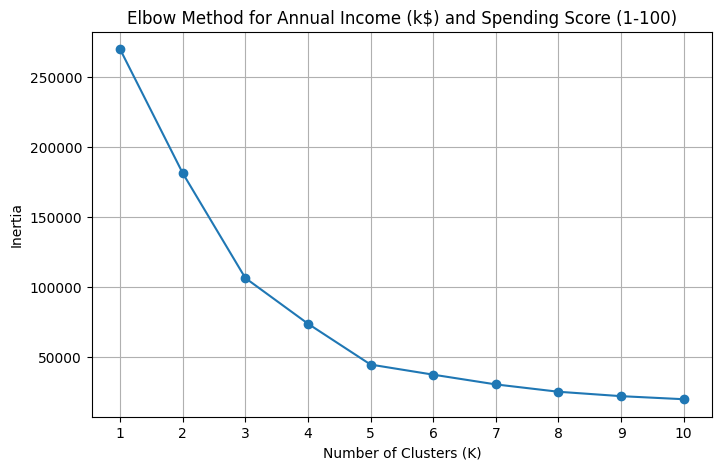

In [19]:
# Step 1: Convert Gender to numerical values
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Define the feature pairs to evaluate
feature_pairs = [
    ['Age', 'Annual Income (k$)'],
    ['Age', 'Spending Score (1-100)'],
    ['Annual Income (k$)', 'Spending Score (1-100)']
]

# Step 2: Determine optimal K using Elbow Method
for features in feature_pairs:
    X = df[features]
    
    inertia = []
    K_range = range(1, 11)  # Testing K from 1 to 10
    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)
    
    # Plot the Elbow Method
    plt.figure(figsize=(8, 5))
    plt.plot(K_range, inertia, marker='o')
    plt.title(f'Elbow Method for {features[0]} and {features[1]}')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Inertia')
    plt.xticks(K_range)
    plt.grid()

## K means model for k=3

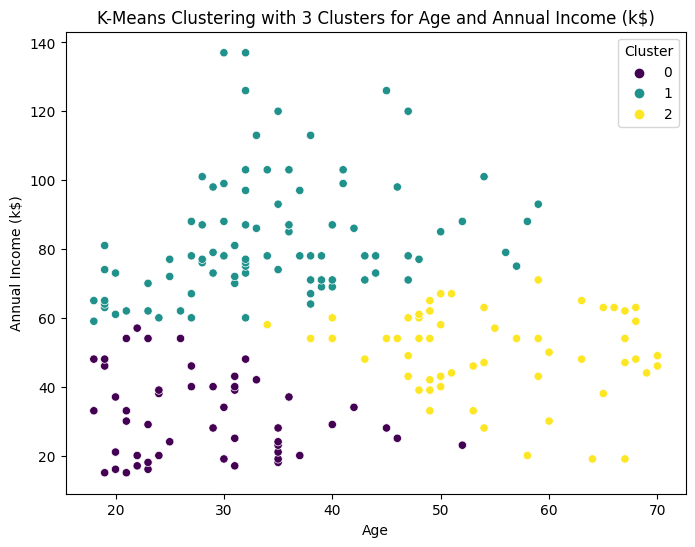

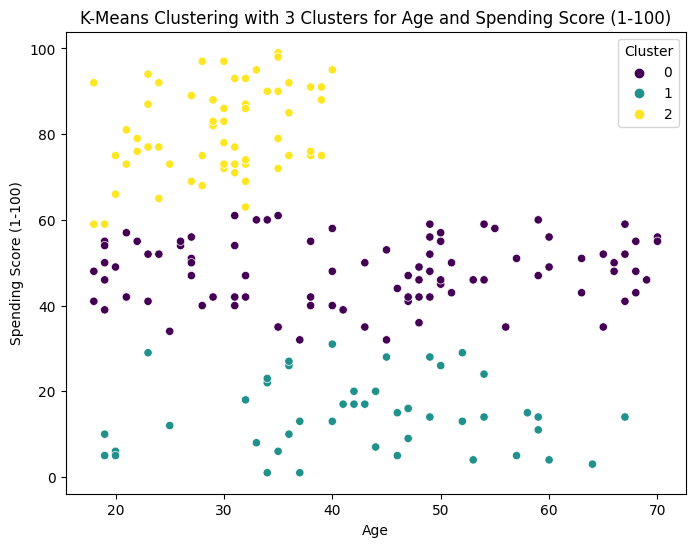

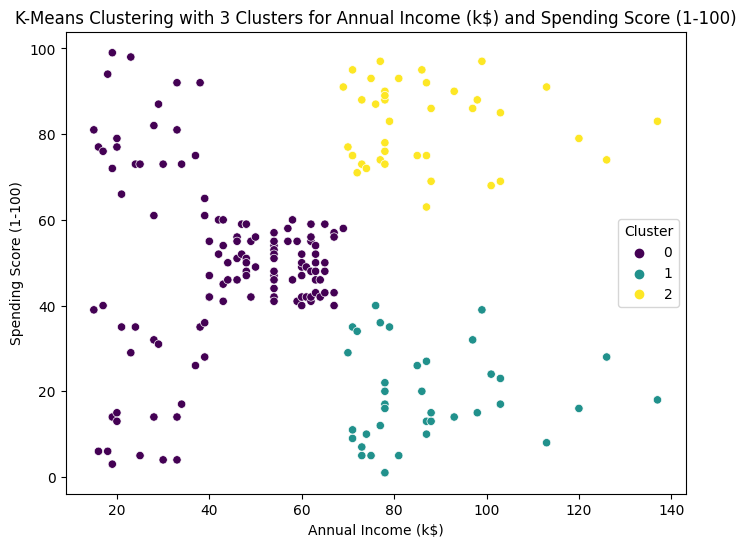

In [20]:
# Assuming the best K was determined to be 3 for demonstration purposes
best_k = 3

# Step 3: Apply K-Means with the best K for each feature pair
for features in feature_pairs:
    X = df[features]
    kmeans = KMeans(n_clusters=best_k, random_state=42)
    df[f'Cluster_{features[0]}_{features[1]}'] = kmeans.fit_predict(X)
    
    # Visualize the clusters
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=features[0], y=features[1], hue=f'Cluster_{features[0]}_{features[1]}', palette='viridis')
    plt.title(f'K-Means Clustering with {best_k} Clusters for {features[0]} and {features[1]}')
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.legend(title='Cluster')

## K means model for k=5

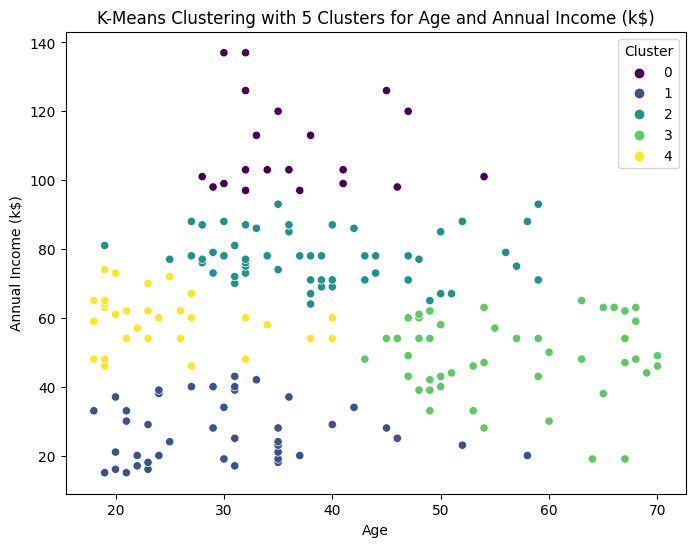

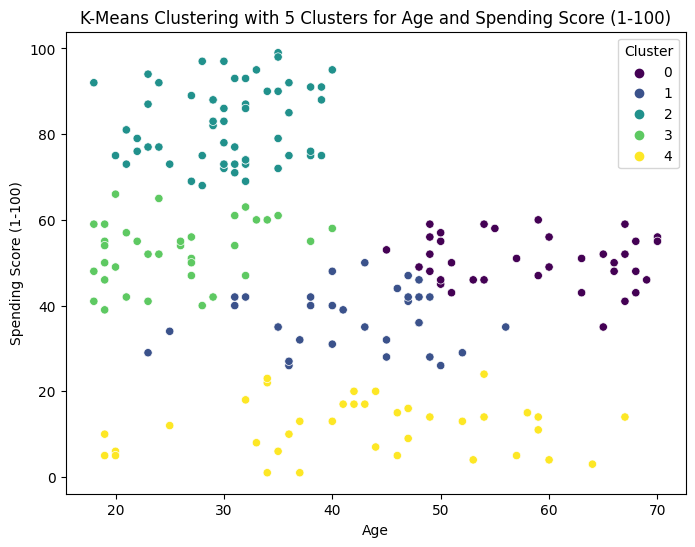

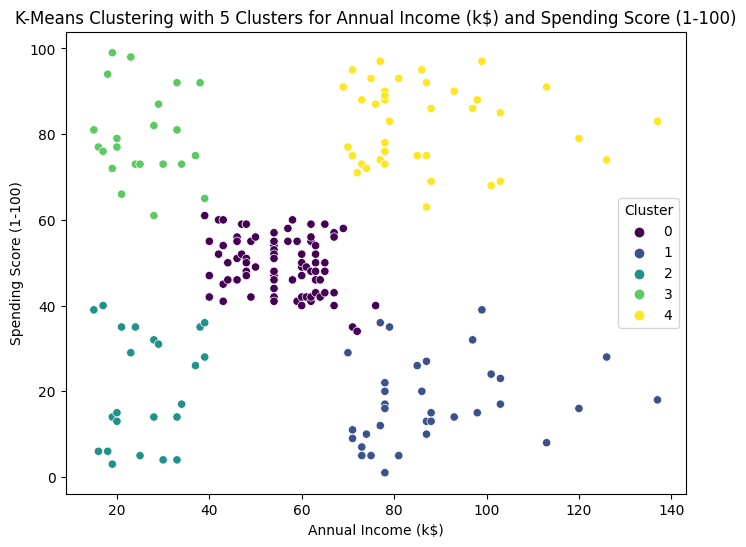

In [21]:
# Assuming the best K was determined to be 3 for demonstration purposes
best_k = 5

# Step 3: Apply K-Means with the best K for each feature pair
for features in feature_pairs:
    X = df[features]
    kmeans = KMeans(n_clusters=best_k, random_state=42)
    df[f'Cluster_{features[0]}_{features[1]}'] = kmeans.fit_predict(X)
    
    # Visualize the clusters
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=features[0], y=features[1], hue=f'Cluster_{features[0]}_{features[1]}', palette='viridis')
    plt.title(f'K-Means Clustering with {best_k} Clusters for {features[0]} and {features[1]}')
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.legend(title='Cluster')

#### Annual Income vs Spending Score (1-100)
- Label 2 is low income and low spending
- Label 3 is low income and high spending
- Label 1 is high income and low spending
- Label 0 is mid income and mid spending
- Label 4 is high income and high spending

# Clustering using K Proto

In [22]:
!pip install kmodes
from kmodes.kprototypes import KPrototypes

In [23]:
# scaled_df contains scaled numerical columns and df contains original data with categorical columns

# Extract categorical column(s) from original df
df_cat = df['Gender']

# Combine scaled numerical columns with categorical column(s)
# scaled_df should have the same index as df_cat
final_df = pd.concat([scaled_df.reset_index(drop=True), df_cat.reset_index(drop=True)], axis=1)

# Display the new dataframe prepared for K-Prototypes modeling
print(final_df)

          Age  Annual Income (k$)  Spending Score (1-100)  Gender
0   -1.424569           -1.738999               -0.434801       0
1   -1.281035           -1.738999                1.195704       0
2   -1.352802           -1.700830               -1.715913       1
3   -1.137502           -1.700830                1.040418       1
4   -0.563369           -1.662660               -0.395980       1
..        ...                 ...                     ...     ...
195 -0.276302            2.268791                1.118061       1
196  0.441365            2.497807               -0.861839       1
197 -0.491602            2.497807                0.923953       0
198 -0.491602            2.917671               -1.250054       0
199 -0.635135            2.917671                1.273347       0

[200 rows x 4 columns]


## Finding Optimum Cluster (k) Using Elbow Method

Text(0.5, 1.0, 'Elbow Method for Optimal k')

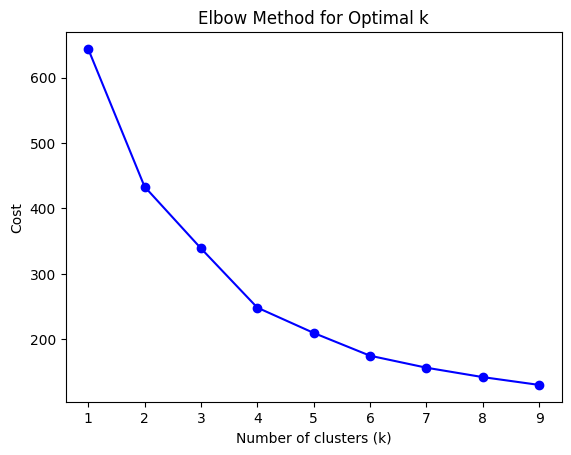

In [24]:
costs = []
K_range = range(1, 10)  # Checking for k values from 1 to 10

for k in K_range:
    kproto = KPrototypes(n_clusters=k, init='Huang', random_state=42)
    kproto.fit_predict(final_df, categorical=[3])  # Assuming 'Gender' is categorical
    costs.append(kproto.cost_)

# Plotting the elbow curve
plt.plot(K_range, costs, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Cost')
plt.title('Elbow Method for Optimal k')

## Finding Optimum Cluster (k) Using Silhoutte Score

In [25]:
from sklearn.metrics import silhouette_score

# Convert categorical columns to numerics for silhouette calculation (since it's for numerical data only)
df_for_silhouette = final_df.copy()
df_for_silhouette['Gender'] = df_for_silhouette['Gender'].map({'Male': 0, 'Female': 1})
print(df_for_silhouette)

          Age  Annual Income (k$)  Spending Score (1-100)  Gender
0   -1.424569           -1.738999               -0.434801     NaN
1   -1.281035           -1.738999                1.195704     NaN
2   -1.352802           -1.700830               -1.715913     NaN
3   -1.137502           -1.700830                1.040418     NaN
4   -0.563369           -1.662660               -0.395980     NaN
..        ...                 ...                     ...     ...
195 -0.276302            2.268791                1.118061     NaN
196  0.441365            2.497807               -0.861839     NaN
197 -0.491602            2.497807                0.923953     NaN
198 -0.491602            2.917671               -1.250054     NaN
199 -0.635135            2.917671                1.273347     NaN

[200 rows x 4 columns]


In [26]:
silhouette_scores = []
K_range = range(2, 10)  # Silhouette score requires at least 2 clusters

for k in K_range:
    kproto = KPrototypes(n_clusters=k, init='Huang', random_state=42)
    clusters = kproto.fit_predict(df_for_silhouette, categorical=[3])
    
    # Compute silhouette score (using the numerical features only)
    score = silhouette_score(df_for_silhouette, clusters)
    silhouette_scores.append(score)

# Plotting the silhouette score curve
plt.plot(K_range, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')

ValueError: Input contains NaN.

# Model

In [ ]:
# K-Prototypes model
kproto = KPrototypes(n_clusters=3, init='Huang', random_state=42)

# Fitting the model (the index 0 corresponds to the categorical column 'Gender')
clusters = kproto.fit_predict(final_df, categorical=[3])

# Assign the cluster labels back to the dataframe
final_df['Cluster'] = clusters

# Output the clustered data
print(final_df)

##  Checking Cluster Distribution Across All Features

#### K-Prototypes algorithm clusters based on all columns, not just Annual Income and Spending Score. However, in visualization, we are only plotting those two variables because it's easier to plot 2D or 3D data.

In [ ]:
# Scatter plot of clusters based on 'Annual Income' and 'Spending Score'
plt.scatter(final_df['Annual Income (k$)'], final_df['Spending Score (1-100)'], c=final_df['Cluster'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Prototypes Clusters based on Annual Income and Spending Score')
plt.show()

#### Using pairplot to visualize how clusters vary across all pairs of numerical features

In [ ]:
# Convert the cluster labels to categorical (if not already) for proper coloring in pairplot
final_df['Cluster'] = final_df['Cluster'].astype(str)

# Select numerical columns for pairplot
num_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Generate pairplot
sns.pairplot(final_df[num_cols + ['Cluster']], hue='Cluster', palette='Set1', diag_kind='kde', plot_kws={'alpha':0.6, 's':80})